In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Antes se hizo un análisis en el archivo /home/jlhb1984/py-projects/Archived/ransa TS000160370.ipynb

In [54]:
path=input("Digita la ruta en donde está el archivo csv con la da ta cruda: ")
print(path)
raw_fuel_data=pd.read_csv(path,sep=';',encoding='latin1')
raw_fuel_data.info()

/home/jlhb1984/py-projects/data/veepo/wcr728.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15749 entries, 0 to 15748
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Created  15749 non-null  object
 1   Message  15749 non-null  object
 2   Status   15749 non-null  object
dtypes: object(3)
memory usage: 369.2+ KB


In [55]:
e0x=raw_fuel_data[raw_fuel_data['Status'].str.contains('3E0')]
row_number=e0x.shape[0]

In [56]:
#Este algoritmo solo tomará la primera trama 3E01. En un mensaje normal pueden haber 2 si hay 2 sensores conectados o 4 si solo hay un sensor conectado.
fs01_dec_value=[]
fs02_dec_value=[]

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E01')
    if len(e0x_aux)>0:
        fs01=(e0x_aux[aux:aux+18])
        if len(fs01)>17:
            msb=fs01[10:12]
            lsb=fs01[8:10]
            measure=msb+lsb
            fs01_dec_value.append(int(measure,16))
            #print('fs01: ',fs01)

for i in range(0,row_number):
    e0x_aux=e0x.iloc[i,2]
    aux=e0x_aux.find('3E02')
    if len(e0x_aux)>0:
        fs02=e0x_aux[aux:aux+18]
        if len(fs02)>17:
            msb=fs02[10:12]
            lsb=fs02[8:10]
            measure=msb+lsb
            fs02_dec_value.append(int(measure,16))
            #print(fs01_cad)   

fs01_count=len(fs01_dec_value)
fs02_count=len(fs02_dec_value)
print(fs01_count,fs02_count)

8663 8674


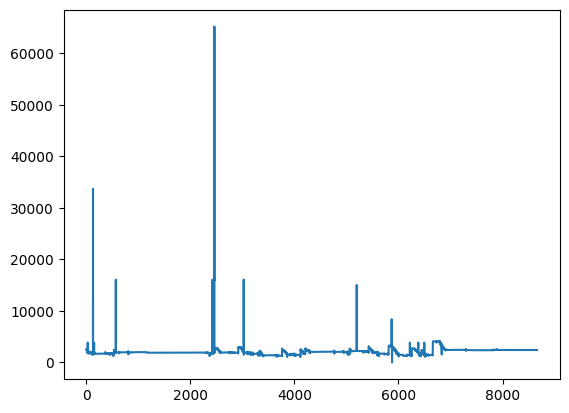

In [57]:
fs01_x_values=[]
fs02_x_values=[]

for i in range(0,fs01_count):
    fs01_x_values.append(i)
    
for i in range(0,fs02_count):
    fs02_x_values.append(i)

plt.plot(fs01_x_values,fs01_dec_value)
#plt.plot(fs02_x_values,fs02_dec_value)

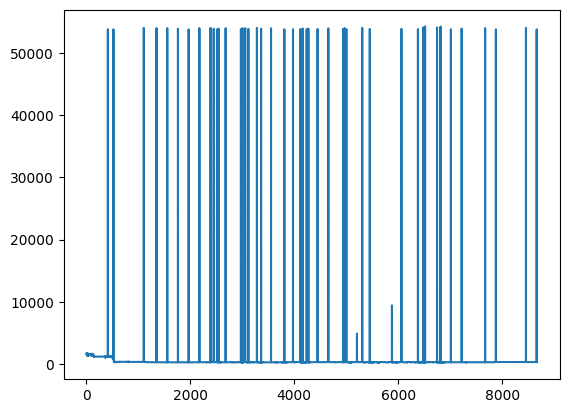

In [58]:
plt.plot(fs02_x_values,fs02_dec_value)